In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import make_circles

In [2]:
NOISE = 0
UNASSIGNED = 0
core = -1
edge = -2

In [3]:
def neighbor_points(data, pointId, radius):
    points = []
    for i in range(len(data)):
        #Euclidian distance using L2 Norm
        if np.linalg.norm(data[i] - data[pointId]) <= radius:
            points.append(i)
    return points

In [4]:
def dbscan(data, Eps, MinPt):
    data = data.values
    #Initilizing all pointlable to unassign
    clusters  = [UNASSIGNED] * len(data)
    pointcount = []
    
    #Initilizing list for core/noncore point
    corepoint=[]
    noncore=[]

    #Find all neigbor for all point
    for i in range(len(data)):
        pointcount.append(neighbor_points(data,i,Eps))
    
    #Find all core point, edgepoint and noise
    for i in range(len(pointcount)):
        if (len(pointcount[i])>=MinPt):
            clusters[i]=core
            corepoint.append(i)
        else:
            noncore.append(i)

    for i in noncore:
        for j in pointcount[i]:
            if j in corepoint:
                clusters[i]=edge
                break
            
    #Start assigning point to cluster
    cl = 1

    for i in range(len(clusters)):
        q = []
        if (clusters[i] == core):
            clusters[i] = cl
            for x in pointcount[i]:
                if(clusters[x]==core):
                    q.append(x)
                    clusters[x]=cl
                elif(clusters[x]==edge):
                    clusters[x]=cl
            #Stop when all point in Queue has been checked   
            while len(q)>0:
                neighbors = pointcount[q[0]]
                del q[0]
                for y in neighbors:
                    if (clusters[y]==core):
                        clusters[y]=cl
                        q.append(y)
                    if (clusters[y]==edge):
                        clusters[y]=cl
            #Move to next cluster
            cl=cl+1 
           
    return clusters

In [5]:
dataset = make_circles(n_samples=1500, factor=.5, noise=.05)
dataset = pd.DataFrame(dataset[0])

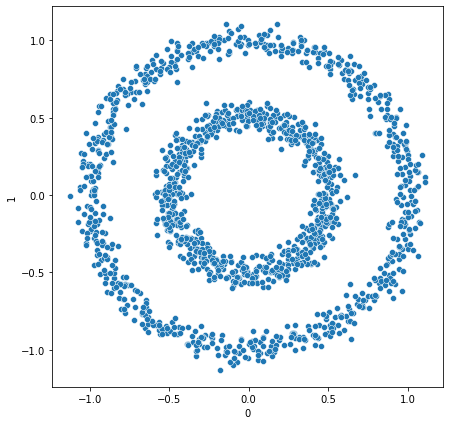

In [6]:
plt.figure(figsize=(7,7))
sns.scatterplot(x=dataset.iloc[:,0],y=dataset.iloc[:,1])
plt.show()

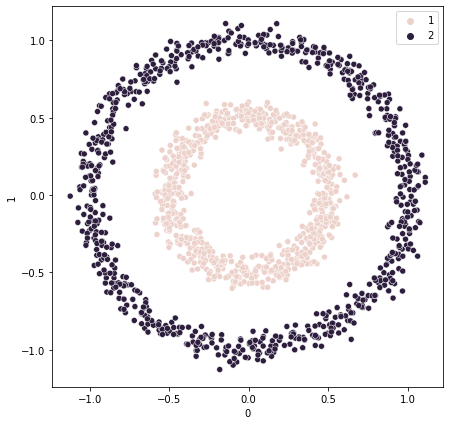

In [7]:
clusters = dbscan(dataset,0.2,5)
plt.figure(figsize=(7,7))
sns.scatterplot(x=dataset.iloc[:,0],y=dataset.iloc[:,1],hue=clusters)
plt.show()